<a href="https://colab.research.google.com/github/Hemang13tailor/Ocean-Temperature-Predictor/blob/main/Time_series_Kochi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
data = pd.read_csv('/content/1982_2023_dataset.csv')

In [ ]:
data.head()

,DATETIME,TIME,LON,LAT,DEP,SST\n
0,"""01-JAN-1982""",1461,75.125,9.875,0,28.16
1,"""02-JAN-1982""",1462,75.125,9.875,0,28.32
2,"""03-JAN-1982""",1463,75.125,9.875,0,28.17
3,"""04-JAN-1982""",1464,75.125,9.875,0,28.13
4,"""05-JAN-1982""",1465,75.125,9.875,0,28.31


In [ ]:
data.drop(['DEP', 'LON', 'LAT', 'TIME'], axis = 1, inplace = True)
data['SST'] = data['SST\n']
data.drop(['SST\n'], axis = 1, inplace = True)
data.head()

,DATETIME,SST
0,"""01-JAN-1982""",28.16
1,"""02-JAN-1982""",28.32
2,"""03-JAN-1982""",28.17
3,"""04-JAN-1982""",28.13
4,"""05-JAN-1982""",28.31


In [ ]:
data[['DAY', 'MONTH', 'YEAR']] = data['DATETIME'].str.extract(r'(\d+)-([A-Z]+)-(\d+)')
data.head()

,DATETIME,SST,DAY,MONTH,YEAR
0,"""01-JAN-1982""",28.16,01,JAN,1982
1,"""02-JAN-1982""",28.32,02,JAN,1982
2,"""03-JAN-1982""",28.17,03,JAN,1982
3,"""04-JAN-1982""",28.13,04,JAN,1982
4,"""05-JAN-1982""",28.31,05,JAN,1982


In [ ]:
data['DAY'] = pd.to_numeric(data['DAY'])
data['YEAR'] = pd.to_numeric(data['YEAR'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15338 entries, 0 to 15337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  15338 non-null  object 
 1   SST       15338 non-null  float64
 2   DAY       15338 non-null  int64  
 3   MONTH     15338 non-null  object 
 4   YEAR      15338 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 599.3+ KB


In [ ]:
data.drop(['DATETIME'], axis = 1, inplace = True)
data.head()

,SST,DAY,MONTH,YEAR
0,28.16,1,JAN,1982
1,28.32,2,JAN,1982
2,28.17,3,JAN,1982
3,28.13,4,JAN,1982
4,28.31,5,JAN,1982


In [ ]:
months = {'JAN':0, 'FEB':1, 'MAR':2, 'APR':3, 'MAY':4, 'JUN':5, 'JUL':6, 'AUG':7, 'SEP':8,
       'OCT':9, 'NOV':10, 'DEC':11}
data['MONTH'] = data['MONTH'].map(months)
data

,SST,DAY,MONTH,YEAR
0,28.16,1,0,1982
1,28.32,2,0,1982
2,28.17,3,0,1982
3,28.13,4,0,1982
4,28.31,5,0,1982
...,...,...,...,...
15333,29.63,27,11,2023
15334,29.60,28,11,2023
15335,29.68,29,11,2023
15336,29.75,30,11,2023


In [ ]:
order_of_col = ['DAY', 'MONTH', 'YEAR', 'SST']
data = data.reindex(columns = order_of_col)
data.head()

,DAY,MONTH,YEAR,SST
0,1,0,1982,28.16
1,2,0,1982,28.32
2,3,0,1982,28.17
3,4,0,1982,28.13
4,5,0,1982,28.31


In [ ]:
SST_list = data['SST'].tolist()
a = len(SST_list)
past_6_SST_list = []
past_6_SST_list.append(SST_list[0])
past_6_SST_list.append(SST_list[0])
past_6_SST_list.append(SST_list[0])
past_6_SST_list.append(SST_list[0])
past_6_SST_list.append(SST_list[0])
past_6_SST_list.append(SST_list[0])

for i in range(6, a):
  b = i - 6
  c = SST_list[b]
  past_6_SST_list.append(c)

data['past_6_SST'] = past_6_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST
0,1,0,1982,28.16,28.16
1,2,0,1982,28.32,28.16
2,3,0,1982,28.17,28.16
3,4,0,1982,28.13,28.16
4,5,0,1982,28.31,28.16


In [ ]:
past_7_SST_list = []

for i in range(0, 7):
  past_7_SST_list.append(SST_list[0])

for i in range(7, a):
  b = i - 7
  c = SST_list[b]
  past_7_SST_list.append(c)

data['past_7_SST'] = past_7_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST
0,1,0,1982,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16
2,3,0,1982,28.17,28.16,28.16
3,4,0,1982,28.13,28.16,28.16
4,5,0,1982,28.31,28.16,28.16


In [ ]:
past_8_SST_list = []

for i in range(0, 8):
  past_8_SST_list.append(SST_list[0])

for i in range(8, a):
  b = i - 8
  c = SST_list[b]
  past_8_SST_list.append(c)

data['past_8_SST'] = past_8_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST
0,1,0,1982,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16


In [ ]:
past_9_SST_list = []

for i in range(0, 9):
  past_9_SST_list.append(SST_list[0])

for i in range(9, a):
  b = i - 9
  c = SST_list[b]
  past_9_SST_list.append(c)

data['past_9_SST'] = past_9_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16


In [ ]:
past_10_SST_list = []

for i in range(0, 10):
  past_10_SST_list.append(SST_list[0])

for i in range(10, a):
  b = i - 10
  c = SST_list[b]
  past_10_SST_list.append(c)

data['past_10_SST'] = past_10_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16


In [ ]:
past_11_SST_list = []

for i in range(0, 11):
  past_11_SST_list.append(SST_list[0])

for i in range(11, a):
  b = i - 11
  c = SST_list[b]
  past_11_SST_list.append(c)

data['past_11_SST'] = past_11_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16,28.16


In [ ]:
past_12_SST_list = []

for i in range(0, 12):
  past_12_SST_list.append(SST_list[0])

for i in range(12, a):
  b = i - 12
  c = SST_list[b]
  past_12_SST_list.append(c)

data['past_12_SST'] = past_12_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST,past_12_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16,28.16,28.16


In [ ]:
past_13_SST_list = []

for i in range(0, 13):
  past_13_SST_list.append(SST_list[0])

for i in range(13, a):
  b = i - 13
  c = SST_list[b]
  past_13_SST_list.append(c)

data['past_13_SST'] = past_13_SST_list

In [ ]:
past_14_SST_list = []

for i in range(0, 14):
  past_14_SST_list.append(SST_list[0])

for i in range(14, a):
  b = i - 14
  c = SST_list[b]
  past_14_SST_list.append(c)

data['past_14_SST'] = past_14_SST_list

In [ ]:
past_15_SST_list = []

for i in range(0, 15):
  past_15_SST_list.append(SST_list[0])

for i in range(15, a):
  b = i - 15
  c = SST_list[b]
  past_15_SST_list.append(c)

data['past_15_SST'] = past_15_SST_list
data.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST,past_12_SST,past_13_SST,past_14_SST,past_15_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16


In [ ]:
data

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST,past_12_SST,past_13_SST,past_14_SST,past_15_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15333,27,11,2023,29.63,29.59,29.65,29.81,29.89,29.89,29.79,29.57,29.71,29.82,29.97
15334,28,11,2023,29.60,29.46,29.59,29.65,29.81,29.89,29.89,29.79,29.57,29.71,29.82
15335,29,11,2023,29.68,29.39,29.46,29.59,29.65,29.81,29.89,29.89,29.79,29.57,29.71
15336,30,11,2023,29.75,29.45,29.39,29.46,29.59,29.65,29.81,29.89,29.89,29.79,29.57


In [ ]:
new_data_train = data.iloc[0:13998, :]
new_data_test = data.iloc[13998:, :]

In [ ]:
new_data_train.head()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST,past_12_SST,past_13_SST,past_14_SST,past_15_SST
0,1,0,1982,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
1,2,0,1982,28.32,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
2,3,0,1982,28.17,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
3,4,0,1982,28.13,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16
4,5,0,1982,28.31,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16,28.16


In [ ]:
new_data_train.tail()

,DAY,MONTH,YEAR,SST,past_6_SST,past_7_SST,past_8_SST,past_9_SST,past_10_SST,past_11_SST,past_12_SST,past_13_SST,past_14_SST,past_15_SST
13993,26,3,2020,31.10,31.56,31.34,31.15,30.90,31.05,31.08,30.93,30.66,30.65,30.71
13994,27,3,2020,31.15,31.59,31.56,31.34,31.15,30.90,31.05,31.08,30.93,30.66,30.65
13995,28,3,2020,31.14,31.47,31.59,31.56,31.34,31.15,30.90,31.05,31.08,30.93,30.66
13996,29,3,2020,31.00,30.87,31.47,31.59,31.56,31.34,31.15,30.90,31.05,31.08,30.93
13997,30,3,2020,31.10,30.58,30.87,31.47,31.59,31.56,31.34,31.15,30.90,31.05,31.08


In [ ]:
X_train =new_data_train.drop(columns='SST')
y_train = new_data_train['SST']
X_test = new_data_test.drop(columns="SST")
y_test = new_data_test['SST']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
def create_sequences(dataset, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(dataset) - sequence_length):
        sequences.append(dataset[i:i + sequence_length])
        targets.append(target[i + sequence_length])
    return np.array(sequences), np.array(targets)

In [ ]:
sequence_length = 10
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, sequence_length)

In [ ]:
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

In [ ]:
model = Sequential()

#First LSTM Layer
model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

 #second LSTM layer
model.add(LSTM(units=40, return_sequences=True))

model.add(LSTM(units=40,return_sequences=True))

model.add(LSTM(units=30))

#third LSTM Layer
model.add(Dense(10, activation='relu'))

# output Layer
model.add(Dense(units=1))

from tensorflow.keras.optimizers import Adam

optimizers= Adam(learning_rate=0.001)
model.compile(optimizer=optimizers, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=25)

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 226.4458
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0482
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0819
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.0592
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.0574
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.0507
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.0597
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.0728
Epoch 9/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9382
Epoch 10/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.5102
Epoch 11/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4054
Epoch 12/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.3643
Epoch 13/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3355
Epoch 14/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.3309
Epoch 15/100
560/560 ━━━━━━━━━━━━━

In [ ]:
predictions = model.predict(X_test_seq)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
predictions_df = pd.DataFrame({
    'Actual': y_test_seq,
    'Predicted': predictions.flatten()
})
from google.colab import files

csv_filename='predictions.csv'
predictions_df.to_csv(csv_filename, index=False)

print(f'Predictions saved to predictions.csv')

Predictions saved to predictions.csv


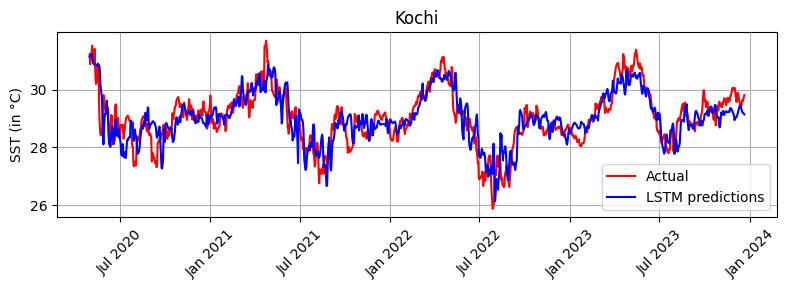

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates_test = pd.date_range(start='2020-05-01', end='2023-12-31', freq='D')
dates_test = dates_test[:len(y_test_seq)]
# dates_test = dates_test[-len(y_test_seq):]

plt.figure(figsize=(8,3))
plt.plot(dates_test, y_test_seq, color='red', label='Actual')
plt.plot(dates_test, predictions, color='blue', label='LSTM predictions')
# plt.plot(y_test_seq, color='red', label='Actual')
# plt.plot(predictions, color='blue', label='Predicted')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.ylabel("SST (in °C)")
plt.title('Kochi')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_seq, predictions)
r2 = r2_score(y_test_seq, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.28367326665093956
R-squared (R²): 0.6790414001847997
